Movie Success Prediction Using TMDB Metadata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("movies_metadata.csv", low_memory=False)
df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.shape


(45466, 24)

In [4]:
df.columns


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df = df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']]
df.head()


,budget,revenue,runtime,vote_average,vote_count
0,30000000,373554033.0,81.0,7.7,5415.0
1,65000000,262797249.0,104.0,6.9,2413.0
2,0,0.0,101.0,6.5,92.0
3,16000000,81452156.0,127.0,6.1,34.0
4,0,76578911.0,106.0,5.7,173.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45466 non-null  object 
 1   revenue       45460 non-null  float64
 2   runtime       45203 non-null  float64
 3   vote_average  45460 non-null  float64
 4   vote_count    45460 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [8]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')


In [9]:
df = df.dropna()
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]


In [10]:
df.describe()


,budget,revenue,runtime,vote_average,vote_count
count,5.380000e+03,5.380000e+03,5380.000000,5380.000000,5380.000000
mean,3.109946e+07,9.033491e+07,109.827695,6.273829,732.445353
std,4.016490e+07,1.661531e+08,22.041188,0.925280,1251.597415
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,5.027750e+06,7.016471e+06,95.000000,5.700000,77.000000
50%,1.700000e+07,2.992061e+07,106.000000,6.300000,276.500000
75%,4.000000e+07,9.997431e+07,120.000000,6.900000,798.750000
max,3.800000e+08,2.787965e+09,338.000000,9.100000,14075.000000


In [30]:
df['success'] = ((df['revenue'] / df['budget']) >= 2).astype(int)
df.head()


,budget,revenue,runtime,vote_average,vote_count,success
0,30000000.0,373554033.0,81.0,7.7,5415.0,1
1,65000000.0,262797249.0,104.0,6.9,2413.0,1
3,16000000.0,81452156.0,127.0,6.1,34.0,1
5,60000000.0,187436818.0,170.0,7.7,1886.0,1
8,35000000.0,64350171.0,106.0,5.5,174.0,0


In [12]:
df['success'].value_counts()


success
1    3756
0    1624
Name: count, dtype: int64

Status:
Dataset loaded, cleaned, relevant features selected, and target variable created.

EDA Objective:
Understand how budget, runtime, and audience metrics relate to movie success.

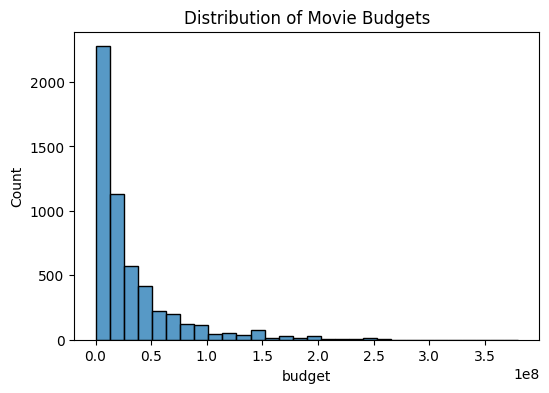

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['budget'], bins=30)
plt.title("Distribution of Movie Budgets")
plt.show()

#Movie budgets are highly skewed, with a small number of high-budget productions dominating the distribution.

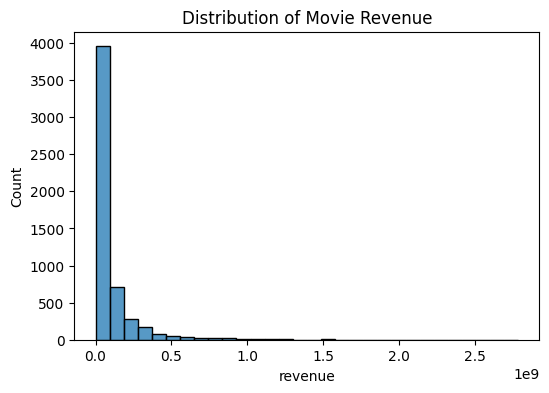

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['revenue'], bins=30)
plt.title("Distribution of Movie Revenue")
plt.show()

#Revenue is even more skewed than budget. This is common in entertainment.


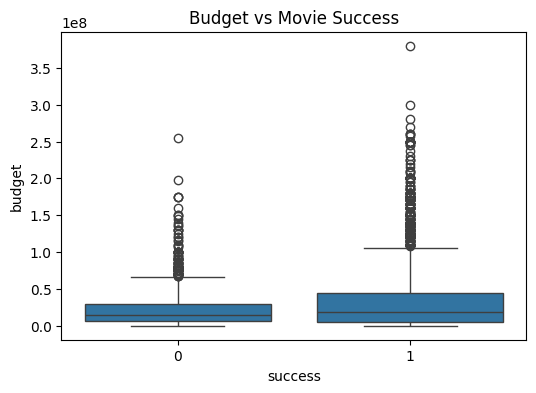

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='success', y='budget', data=df)
plt.title("Budget vs Movie Success")
plt.show()

#successful movies tend to have higher budgets, but there are many exceptions. High budget does not guarantee success.

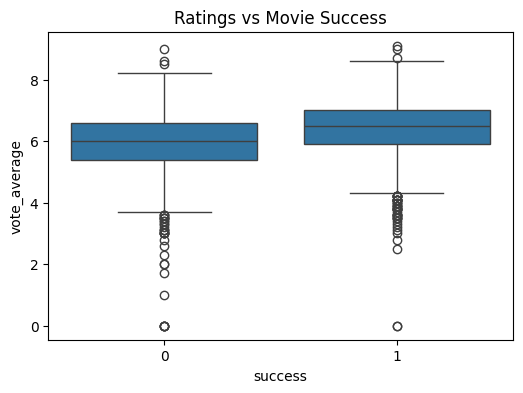

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='success', y='vote_average', data=df)
plt.title("Ratings vs Movie Success")
plt.show()

#audience reviews play an important role in a movie's success. Higher-rated movies are more likely to be successful, but there are exceptions.

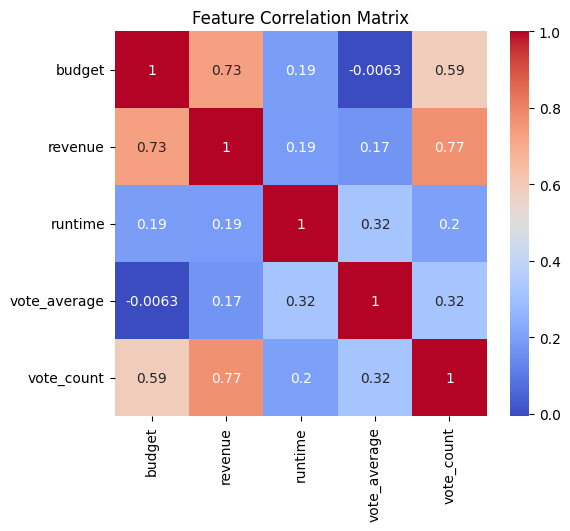

In [17]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['budget','revenue','runtime','vote_average','vote_count']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [18]:
X = df[['budget', 'runtime', 'vote_average', 'vote_count']]
y = df['success']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7537174721189591
              precision    recall  f1-score   support

           0       0.70      0.28      0.40       315
           1       0.76      0.95      0.85       761

    accuracy                           0.75      1076
   macro avg       0.73      0.61      0.62      1076
weighted avg       0.74      0.75      0.71      1076



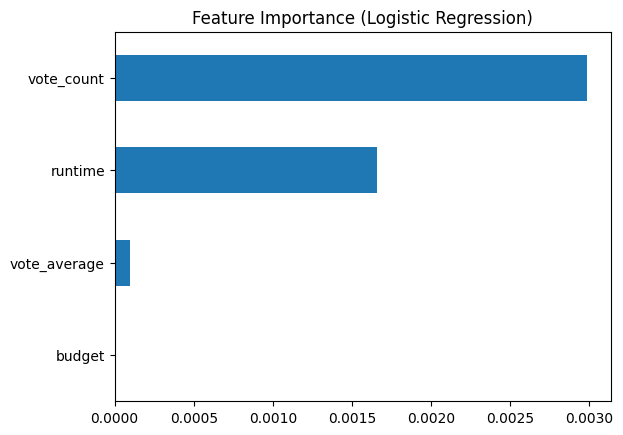

In [22]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [23]:
import pickle

with open("movie_success_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=8
    ))
])


In [26]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2


In [27]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7611524163568774
              precision    recall  f1-score   support

           0       0.62      0.46      0.53       315
           1       0.80      0.88      0.84       761

    accuracy                           0.76      1076
   macro avg       0.71      0.67      0.69      1076
weighted avg       0.75      0.76      0.75      1076



In [28]:
import pickle

with open("movie_success_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [31]:
df['success'].value_counts(normalize=True)


success
1    0.512082
0    0.487918
Name: proportion, dtype: float64

In [32]:
X = df[['budget', 'runtime', 'vote_average', 'vote_count']]
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])


In [34]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,2


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[380 145]
 [152 399]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       525
           1       0.73      0.72      0.73       551

    accuracy                           0.72      1076
   macro avg       0.72      0.72      0.72      1076
weighted avg       0.72      0.72      0.72      1076



In [36]:
y_prob = pipeline.predict_proba(X_test)[:, 1]


In [37]:
y_custom = (y_prob >= 0.6).astype(int)


In [38]:
print(confusion_matrix(y_test, y_custom))


[[428  97]
 [231 320]]


In [39]:
with open("movie_success_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)
